In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score, recall_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('C:\\Users\\aysen\\Downloads\\preprocessed_MissF_asthma.csv')
#df = pd.read_csv('preprocessed_KNN_asthma.csv')

df = df.drop(['Unnamed: 0'], axis=1)
#df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)


print(df.shape)
print("Number of non-null rows in EventDay: ", df.EventDay.count())
display(df.head())

(2583, 103)
Number of non-null rows in EventDay:  202


,SubjectNr,DayNo,weekday,dayType,stepsTotalDaily,stepsTotalDetailed,steps00,steps01,steps02,steps03,steps04,steps05,steps06,steps07,steps08,steps09,steps10,steps11,steps12,steps13,steps14,steps15,steps16,steps17,steps18,steps19,steps20,steps21,steps22,steps23,HR05Perc,HR95Perc,HR00,HR01,HR02,HR03,HR04,HR05,HR06,HR07,HR08,HR09,HR10,HR11,HR12,HR13,HR14,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HRAvgSleep,HRMinSleep,HRMaxSleep,bedtimeReport,waketimeReport,FG,FHX,FHN,TG,TN,TX,SQ,SP,DR,RH,RHX,O3,PM10,PM25,Admission_LY,Age,BirthMonth,BirthYear,BMI,BMI_SDS,CF_Asthma,DailyActiv,DayCare,Dis_Chronic,Gender,Height,Hosp_treatme,Hospital_Trt,PetsHome,SchoolYear,SmokeHome,Vaccination,Weight,school_year_edit,Urbanisation,urbanisation2,steps15_19,week,steps_hour_max,AVGHR_daily,CONDITION,EventDay
0,1771258,0,Tue,school,3723.0,3723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,137.0,164.43,312.55,605.0,1640.0,321.55,82.0,451.0,245.0,135.0,160.0,164.0,41.0,0.0,68.0,120.0,73.591,70.433,68.957,65.709,68.0145,67.5115,67.273,90.9345,104.363,97.341,100.975,120.0,97.0385,101.409,90.8445,90.9365,93.341,89.8,83.4,87.8,91.5,93.30,77.1,78.6,75.0,61.0,93.0,22.0,7.0,6.3,8,4,14.0,85,19.7,5.4,58,0.0,0,0,3.86,23.42,13.04,1,15,12,2002.0,19.5,-0.1,Controlled asthma,School,0.0,0.0,Female,163.2,0.0,0.0,Yes,4.0,No,0.0,51.9,Secondary school year 4,1.0,Extremely urbanised,1099.55,1.0,1640.0,90.0,Controlled asthma,NaN
1,1771258,1,Wed,school,10015.0,10015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,607.0,580.0,325.0,180.00,322.00,181.0,491.0,161.00,10.0,744.0,1146.0,4355.0,722.0,142.0,49.0,0.0,82.0,168.0,73.600,75.200,70.750,92.000,76.0000,70.3000,82.300,78.0000,99.000,113.000,129.800,95.1,91.6000,96.690,108.5000,85.2500,93.400,95.8,101.8,142.3,107.8,104.20,91.8,93.0,84.0,67.0,121.0,21.0,8.0,10.0,12,8,11.3,100,13.1,0.2,2,0.9,2,1,25.72,10.83,3.09,1,15,12,2002.0,19.5,-0.1,Controlled asthma,School,0.0,0.0,Female,163.2,0.0,0.0,Yes,4.0,No,0.0,51.9,Secondary school year 4,1.0,Extremely urbanised,2061.00,1.0,4355.0,94.0,Controlled asthma,NaN
2,1771258,2,Thu,school,3811.0,3811.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,561.0,159.0,356.0,26.00,591.00,109.0,114.0,456.00,155.0,727.0,46.0,139.0,210.0,6.0,93.0,0.0,71.0,122.0,79.100,73.100,80.300,78.000,76.1000,74.6000,78.100,98.5000,103.400,100.500,109.600,100.6,105.0000,109.000,86.5000,88.6000,102.800,78.2,85.2,94.0,100.0,89.25,96.5,82.0,76.0,64.0,129.0,22.0,7.0,6.0,9,4,9.9,62,13.3,8.2,89,0.0,0,0,26.94,16.22,4.94,1,15,12,2002.0,19.5,-0.1,Controlled asthma,School,0.0,0.0,Female,163.2,0.0,0.0,Yes,4.0,No,0.0,51.9,Secondary school year 4,1.0,Extremely urbanised,1384.00,1.0,727.0,90.0,Controlled asthma,NaN
3,1771258,3,Fri,school,4346.0,4346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,515.0,673.0,377.0,490.00,192.00,322.0,180.0,523.00,61.0,359.0,174.0,95.0,148.0,196.0,21.0,20.0,66.0,128.0,77.100,79.800,72.600,67.000,80.2000,76.0000,73.600,79.0000,98.500,103.500,106.400,95.5,106.2000,98.200,100.0000,84.3000,86.800,97.2,74.0,107.0,82.4,96.10,90.8,78.2,75.0,59.0,107.0,22.0,8.0,6.9,10,4,9.5,63,11.7,3.2,35,0.0,0,0,6.62,20.86,12.79,1,15,12,2002.0,19.5,-0.1,Controlled asthma,School,0.0,0.0,Female,163.2,0.0,0.0,Yes,4.0,No,0.0,51.9,Secondary school year 4,1.0,Extremely urbanised,1117.00,1.0,673.0,88.0,Controlled asthma,NaN
4,1771258,4,Sat,weekend,3270.0,3270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,92.0,167.00,1324.00,388.0,166.0,101.00,91.0,6.0,224.0,405.0,56.0,65.0,63.0,72.0,64.0,111.0,83.300,77.600,75.100,76.200,72.6000,75.8000,73.800,68.0000,74.800,65.400,94.400,85.7,77.2500,86.500,78.0000,76.6000,90.000,89.1,92.2,110.6,77.4,81.10,76.5,82.0,67.0,57.0,88.0,23.0,9.0,9.3,12,6,11.2,98,12.9,0.5,5,5.5,38,10,29.31,10.35,3.31,1,15,12,2002.0,19.5,-0.1,Controlled asthma,School,0.0,0.0,Female,163.2,0.0,0.0,Yes,4.0,No,0.0,51.9,Secondary school year 4,1.0,Extremely urbanised,422.00,1.0,1324.0,81.0,Controlled asthma,NaN


##### Drop columns that have NaN except for EventDay column

In [3]:
columns_to_drop = df.columns[df.isna().any() & ~df.columns.isin(['EventDay'])]
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.shape

(2583, 103)

##### One-Hot Encoding

In [4]:
one_hot_asthma = pd.get_dummies(df_cleaned[df_cleaned.columns[df_cleaned.dtypes == object].tolist()])
asthma_df = pd.concat([df_cleaned, one_hot_asthma], axis=1)
asthma_df = asthma_df.drop(columns=df_cleaned.columns[df_cleaned.dtypes == object].tolist())
print(asthma_df.shape)

(2583, 144)


###### Feature Selection using Variance Treshold

In [5]:
from sklearn.feature_selection import VarianceThreshold

columns_to_drop = ['EventDay', 'SubjectNr', 'DayNo']
selected_features = asthma_df.columns.drop(columns_to_drop)

# Perform variance threshold feature selection
threshold = 0.2
selector = VarianceThreshold(threshold)
selector.fit(asthma_df[selected_features])
selected_features = selected_features[selector.get_support()]

df_selected = asthma_df[selected_features]
df_selected = pd.concat([asthma_df[columns_to_drop], df_selected], axis=1)
print(df_selected.shape)

df_selected.head()

(2583, 101)


,EventDay,SubjectNr,DayNo,stepsTotalDaily,stepsTotalDetailed,steps00,steps01,steps02,steps03,steps04,steps05,steps06,steps07,steps08,steps09,steps10,steps11,steps12,steps13,steps14,steps15,steps16,steps17,steps18,steps19,steps20,steps21,steps22,steps23,HR05Perc,HR95Perc,HR00,HR01,HR02,HR03,HR04,HR05,HR06,HR07,HR08,HR09,HR10,HR11,HR12,HR13,HR14,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HRAvgSleep,HRMinSleep,HRMaxSleep,bedtimeReport,waketimeReport,FG,FHX,FHN,TG,TN,TX,SQ,SP,DR,RH,RHX,O3,PM10,PM25,Age,BirthMonth,BirthYear,BMI,BMI_SDS,Height,SchoolYear,Weight,Urbanisation,steps15_19,week,steps_hour_max,AVGHR_daily,dayType_school,CF_Asthma_Controlled asthma,CF_Asthma_Cystic Fibrosis,CF_Asthma_Uncontrolled asthma,DailyActiv_School,Gender_Female,Gender_Male,PetsHome_No,PetsHome_Yes,urbanisation2_Extremely urbanised,urbanisation2_Not extremely urbanised,CONDITION_Controlled asthma,CONDITION_Cystic Fibrosis,CONDITION_Uncontrolled asthma
0,NaN,1771258,0,3723.0,3723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,137.0,164.43,312.55,605.0,1640.0,321.55,82.0,451.0,245.0,135.0,160.0,164.0,41.0,0.0,68.0,120.0,73.591,70.433,68.957,65.709,68.0145,67.5115,67.273,90.9345,104.363,97.341,100.975,120.0,97.0385,101.409,90.8445,90.9365,93.341,89.8,83.4,87.8,91.5,93.30,77.1,78.6,75.0,61.0,93.0,22.0,7.0,6.3,8,4,14.0,85,19.7,5.4,58,0.0,0,0,3.86,23.42,13.04,15,12,2002.0,19.5,-0.1,163.2,4.0,51.9,1.0,1099.55,1.0,1640.0,90.0,1,1,0,0,1,1,0,0,1,1,0,1,0,0
1,NaN,1771258,1,10015.0,10015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,607.0,580.0,325.0,180.00,322.00,181.0,491.0,161.00,10.0,744.0,1146.0,4355.0,722.0,142.0,49.0,0.0,82.0,168.0,73.600,75.200,70.750,92.000,76.0000,70.3000,82.300,78.0000,99.000,113.000,129.800,95.1,91.6000,96.690,108.5000,85.2500,93.400,95.8,101.8,142.3,107.8,104.20,91.8,93.0,84.0,67.0,121.0,21.0,8.0,10.0,12,8,11.3,100,13.1,0.2,2,0.9,2,1,25.72,10.83,3.09,15,12,2002.0,19.5,-0.1,163.2,4.0,51.9,1.0,2061.00,1.0,4355.0,94.0,1,1,0,0,1,1,0,0,1,1,0,1,0,0
2,NaN,1771258,2,3811.0,3811.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,561.0,159.0,356.0,26.00,591.00,109.0,114.0,456.00,155.0,727.0,46.0,139.0,210.0,6.0,93.0,0.0,71.0,122.0,79.100,73.100,80.300,78.000,76.1000,74.6000,78.100,98.5000,103.400,100.500,109.600,100.6,105.0000,109.000,86.5000,88.6000,102.800,78.2,85.2,94.0,100.0,89.25,96.5,82.0,76.0,64.0,129.0,22.0,7.0,6.0,9,4,9.9,62,13.3,8.2,89,0.0,0,0,26.94,16.22,4.94,15,12,2002.0,19.5,-0.1,163.2,4.0,51.9,1.0,1384.00,1.0,727.0,90.0,1,1,0,0,1,1,0,0,1,1,0,1,0,0
3,NaN,1771258,3,4346.0,4346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,515.0,673.0,377.0,490.00,192.00,322.0,180.0,523.00,61.0,359.0,174.0,95.0,148.0,196.0,21.0,20.0,66.0,128.0,77.100,79.800,72.600,67.000,80.2000,76.0000,73.600,79.0000,98.500,103.500,106.400,95.5,106.2000,98.200,100.0000,84.3000,86.800,97.2,74.0,107.0,82.4,96.10,90.8,78.2,75.0,59.0,107.0,22.0,8.0,6.9,10,4,9.5,63,11.7,3.2,35,0.0,0,0,6.62,20.86,12.79,15,12,2002.0,19.5,-0.1,163.2,4.0,51.9,1.0,1117.00,1.0,673.0,88.0,1,1,0,0,1,1,0,0,1,1,0,1,0,0
4,NaN,1771258,4,3270.0,3270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,92.0,167.00,1324.00,388.0,166.0,101.00,91.0,6.0,224.0,405.0,56.0,65.0,63.0,72.0,64.0,111.0,83.300,77.600,75.100,76.200,72.6000,75.8000,73.800,68.0000,74.800,65.400,94.400,85.7,77.2500,86.500,78.0000,76.6000,90.000,89.1,92.2,110.6,77.4,81.10,76.5,82.0,67.0,57.0,88.0,23.0,9.0,9.3,12,6,11.2,98,12.9,0.5,5,5.5,38,10,29.31,10.35,3.31,15,12,2002.0,19.5,-0.1,163.2,4.0,51.9,1.0,422.00,1.0,1324.0,81.0,0,1,0,0,1,1,0,0,1,1,0,1,0,0


##### Df without eventDay column

In [6]:
df_withoutEventDay = df_selected[df_selected['EventDay'].isnull()]

##### Remove useless columns & Scale

In [7]:
training = df_withoutEventDay.drop(['EventDay', 'SubjectNr', 'DayNo'], axis = 1)   # without eventDay rows
predicting = df_selected.drop(['EventDay', 'SubjectNr', 'DayNo'], axis = 1)         # with eventDay rows

# Scale training
data_train = training
scaler_train = StandardScaler()
np_scaled_train = scaler_train.fit_transform(data_train)
data_train = pd.DataFrame(np_scaled_train, columns=training.columns)

# Scale predicting
data_pred = predicting
scaler_pred = StandardScaler()
np_scaled_pred = scaler_pred.fit_transform(data_pred)
data_pred = pd.DataFrame(np_scaled_pred, columns=predicting.columns)

print("Length Training: ", len(training), ",    Length Predicting", len(predicting))

Length Training:  2381 ,    Length Predicting 2583


##### Function that will be used in all hyperparameter tunings

In [8]:
def calculate_recall_f1(true_labels, predicted_labels):
    # Convert the labels to binary (anomaly: 1, normal: 0)
    true_labels_binary = true_labels.astype(int)
    predicted_labels_binary = (predicted_labels == -1).astype(int)  
    
    recall = recall_score(true_labels_binary, predicted_labels_binary)
    f1 = f1_score(true_labels_binary, predicted_labels_binary)
    
    return recall, f1

# k-Means Cluster

###### Elbow method to see how many clusters are needed

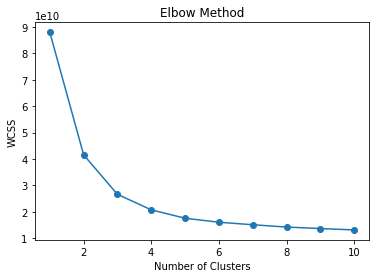

In [9]:
# Initialize lists to store the number of clusters and corresponding WCSS values
num_clusters = []
wcss_values = []

# Set the range of the number of clusters to try
min_clusters = 1
max_clusters = 10

# Perform clustering for different numbers of clusters
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(predicting)
    
    # Compute the within-cluster sum of squares (WCSS)
    wcss = kmeans.inertia_
    
    # Append the number of clusters and WCSS values to the lists
    num_clusters.append(k)
    wcss_values.append(wcss)

# Plot the number of clusters against the WCSS values
plt.plot(num_clusters, wcss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

The clustering is performed on training, and the cluster labels are assigned to it. The cluster means are calculated based on the training data.

Then, for the predicting DataFrame (where all rows are present), the data is standardized using the same scaler as the training data. The cluster labels are predicted for the prediction data using the trained clustering model.

The anomalies are detected by comparing the features of each row in the predicting DataFrame with the corresponding cluster mean from the training data. If any feature deviates from the cluster mean by some threshold value, the row is considered an anomaly.

butttttt: Variances and Heteroscedasticity: The mean does not consider the variances or heteroscedasticity (unequal variances) of different features or clusters.

smth apart from the mean?
hotelling ellipses?: the use of Hotelling's ellipses for anomaly detection becomes more challenging. The main reason is that as the dimensionality increases, the distribution of the Mahalanobis distance (which is used to calculate the T-squared statistic) becomes less reliable due to the curse of dimensionality.



In [10]:
tr = data_train
pre = data_pred

# Select relevant columns for clustering
columns_to_cluster = tr.columns

# Extract the subset of data for clustering from training DataFrame
data_for_clustering = tr[columns_to_cluster]

# Standardize the data
scaler = StandardScaler()
data_for_clustering_standardized = scaler.fit_transform(data_for_clustering)

# Choose the number of clusters
num_clusters = 4 

# Apply k-means clustering on training data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_for_clustering_standardized)

# Get the cluster labels for training data
training_cluster_labels = kmeans.labels_

# Assign cluster labels to the training DataFrame
tr['ClusterLabel'] = training_cluster_labels

# Check the distribution of clusters in training data
training_cluster_counts = tr['ClusterLabel'].value_counts()
#print(training_cluster_counts)

# Calculate cluster medians on training data
training_cluster_medians = tr.groupby('ClusterLabel').median()

# Extract the subset of data for anomaly prediction from predicting DataFrame
data_for_prediction = pre[columns_to_cluster]

# Standardize the data for prediction using the same scaler as training
data_for_prediction_standardized = scaler.transform(data_for_prediction)

# Get the cluster labels for prediction data
prediction_cluster_labels = kmeans.predict(data_for_prediction_standardized)

# Assign cluster labels to the predicting DataFrame
pre['ClusterLabel'] = prediction_cluster_labels

# Check the distribution of clusters in predicting data
prediction_cluster_counts = pre['ClusterLabel'].value_counts()
#print(prediction_cluster_counts)

In [11]:
threshold = 4

# Detect anomalies based on cluster medians
anomaly_rows = []
for index, row in pre.iterrows():
    cluster_label = row['ClusterLabel']
    features = row[columns_to_cluster]
    cluster_median = training_cluster_medians.loc[cluster_label]
    if any(abs(features - cluster_median) > threshold):
        anomaly_rows.append(index)

# Print the detected anomalies
anomalies = pre.loc[anomaly_rows]

# Add to df
df["anomaly7"] = 1
df.loc[anomalies.index, 'anomaly7'] = -1

# Prints
non_null_count = df[df.anomaly7 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly7 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Total amount of anomalies detected:             548
Amount of non-null rows in EventDay:            48
Percentage of non-null rows in EventDay:        23.762376237623762 %


###### Some kind of hyperparameter tuning (takes the longest time)

In [12]:
#thresh_values = [4, 4.2, 4.5, 4.7, 5]  
thresh_values = [4.86, 4.95, 5, 5.05, 5.1]  

best_thresh = None
best_f1_score = 0.0
best_recall = 0.0

for thresh in thresh_values:
    threshold = thresh
    anomaly_rows = []
    for index, row in pre.iterrows():
        cluster_label = row['ClusterLabel']
        features = row[columns_to_cluster]
        cluster_median = training_cluster_medians.loc[cluster_label]
        if any(abs(features - cluster_median) > threshold):
            anomaly_rows.append(index)

    anomalies = pre.loc[anomaly_rows]
    df["anomaly_hyperparam7"] = 1
    df.loc[anomalies.index, 'anomaly_hyperparam7'] = -1
    
    # Evaluate performance using F1-score
    score_recall, score_f1  = calculate_recall_f1(df['EventDay'].notnull(), df['anomaly_hyperparam7'])
    
    if score_f1  > best_f1_score:
        best_f1_score = score_f1
        best_thresh = thresh
        best_recall = score_recall

print("Best Contamination:", best_thresh)
print("Best F1-score:", best_f1_score)
print("Best Recall:", best_recall)
print("")

threshold = best_thresh
anomaly_rows = []
for index, row in pre.iterrows():
    cluster_label = row['ClusterLabel']
    features = row[columns_to_cluster]
    cluster_median = training_cluster_medians.loc[cluster_label]
    if any(abs(features - cluster_median) > threshold):
        anomaly_rows.append(index)

anomalies = pre.loc[anomaly_rows]
df["anomaly7"] = 1
df.loc[anomalies.index, 'anomaly7'] = -1

# Prints
non_null_count = df[df.anomaly7 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly7 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Best Contamination: 4.86
Best F1-score: 0.08627450980392157
Best Recall: 0.10891089108910891

Total amount of anomalies detected:             308
Amount of non-null rows in EventDay:            22
Percentage of non-null rows in EventDay:        10.891089108910892 %


# t-SNE + NearestNeighbors

 t-SNE can indirectly help in anomaly detection by revealing clusters or patterns that are distinct from the majority of the data. Anomalies may appear as isolated or separate points in the t-SNE visualization, indicating their dissimilarity to the surrounding data points.

- use t-SNE dimensionality reduction to obtain lower-dimensionality  
- Use the lower-dimensional representation to calculate distances to the k nearest neighbors for each data point (assess how isolated or close each data point is to its neighboring points. Anomalies are located farther away from their neighbors)  
- threshold to define what is considered an anomaly based on the distances 

In [10]:
# Select relevant columns for t-SNE and anomaly detection
columns_for_tsne = data_train.columns

# Extract the subset of data for t-SNE from training DataFrame
data_for_tsne = data_train[columns_for_tsne]

# Create a t-SNE object
tsne = TSNE(n_components=3)

# Apply t-SNE to obtain the lower-dimensional representation
tsne_result = tsne.fit_transform(data_for_tsne)

# Create a NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=14)

# Fit the model on the training data
nn_model.fit(tsne_result)

# Calculate the distances to the k nearest neighbors for each data point in the prediction data
distances, _ = nn_model.kneighbors(tsne_result)

In [13]:
# Set a threshold to identify anomalies
threshold = 3.6

# Identify anomalies based on the distances to nearest neighbors
anomaly_indices = set()
for i in range(len(distances)):
    if any(distances[i] > threshold):
        anomaly_indices.add(i)

# Get the corresponding data points from the prediction data
anomalies = data_pred.iloc[list(anomaly_indices)]

# Add to df
df["anomaly6"] = 1
df.loc[anomalies.index, 'anomaly6'] = -1

# Prints
non_null_count = df[df.anomaly6 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly6 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Total amount of anomalies detected:             580
Amount of non-null rows in EventDay:            49
Percentage of non-null rows in EventDay:        24.257425742574256 %


###### Some kind of hyperparameter tuning

In [15]:
#thresh_values = [3.6, 3.7, 4, 4.5, 5]  
thresh_values = [3.96, 4, 4.1, 4.3, 4.4, 4.5]  

best_thresh = None
best_f1_score = 0.0
best_recall = 0.0

for thresh in thresh_values:
    threshold = thresh
    anomaly_indices = set()
    for i in range(len(distances)):
        if any(distances[i] > threshold):
            anomaly_indices.add(i)

    anomalies = data_pred.iloc[list(anomaly_indices)]
    df["anomaly_hyperparam6"] = 1
    df.loc[anomalies.index, 'anomaly_hyperparam6'] = -1
    
    # Evaluate performance using F1-score
    score_recall, score_f1  = calculate_recall_f1(df['EventDay'].notnull(), df['anomaly_hyperparam6'])
    
    if score_f1  > best_f1_score:
        best_f1_score = score_f1
        best_thresh = thresh
        best_recall = score_recall

print("Best Contamination:", best_thresh)
print("Best F1-score:", best_f1_score)
print("Best Recall:", best_recall)
print("")

threshold = best_thresh
anomaly_indices = set()
for i in range(len(distances)):
    if any(distances[i] > threshold):
        anomaly_indices.add(i)

anomalies = data_pred.iloc[list(anomaly_indices)]

# Add to df
df["anomaly6"] = 1
df.loc[anomalies.index, 'anomaly6'] = -1

non_null_count = df[df.anomaly6 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly6 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Best Contamination: 3.96
Best F1-score: 0.10931174089068826
Best Recall: 0.13366336633663367

Total amount of anomalies detected:             292
Amount of non-null rows in EventDay:            27
Percentage of non-null rows in EventDay:        13.366336633663368 %


# Isolation Forest

In [16]:
# Train
outliers_fraction = 0.2
ifo = IsolationForest(contamination = outliers_fraction)
ifo.fit(data_train)

# Predict
df['anomaly1'] = pd.Series(ifo.predict(data_pred))

non_null_count = df[df.anomaly1 == -1]['EventDay'].count()
total_rows = df.EventDay.count()

percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly1 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Total amount of anomalies detected:             493
Amount of non-null rows in EventDay:            49
Percentage of non-null rows in EventDay:        24.257425742574256 %


###### Some kind of hyperparameter tuning

In [17]:
#contamination_values = [0.01, 0.1, 0.2, 0.25, 0.3]  
contamination_values = [0.01, 0.1, 0.11, 0.114]  

best_contamination = None
best_f1_score = 0.0
best_recall = 0.0

for contamination in contamination_values:
    ifo = IsolationForest(contamination=contamination, random_state=42)
    ifo.fit(data_train)
    df['anomaly_hyperparam1'] = ifo.predict(data_pred)
    
    # Evaluate performance using F1-score
    score_recall, score_f1  = calculate_recall_f1(df['EventDay'].notnull(), df['anomaly_hyperparam1'])
    
    if score_f1  > best_f1_score:
        best_f1_score = score_f1
        best_contamination = contamination
        best_recall = score_recall

print("Best Contamination:", best_contamination)
print("Best F1-score:", best_f1_score)
print("Best Recall:", best_recall)
print("")

# Train
outliers_fraction = best_contamination
ifo = IsolationForest(contamination = outliers_fraction)
ifo.fit(data_train)

# Predict
df['anomaly1'] = pd.Series(ifo.predict(data_pred))

non_null_count = df[df.anomaly1 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly1 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Best Contamination: 0.114
Best F1-score: 0.1746031746031746
Best Recall: 0.21782178217821782

Total amount of anomalies detected:             302
Amount of non-null rows in EventDay:            37
Percentage of non-null rows in EventDay:        18.316831683168317 %


# OSVM

In [21]:
# Train 
outliers_fraction = 0.2
osvm = OneClassSVM(nu = outliers_fraction, kernel = 'sigmoid', gamma = 0.01)
osvm.fit(data_train)

# Predict
df['anomaly2'] = pd.Series(osvm.predict(data_pred))

# Prints
non_null_count = df[df.anomaly2 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly2 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Total amount of anomalies detected:             507
Amount of non-null rows in EventDay:            31
Percentage of non-null rows in EventDay:        15.346534653465346 %


###### Some kind of hyperparameter tuning

In [22]:
#contamination_values = [0.01, 0.1, 0.2, 0.25, 0.3]  
contamination_values = [0.01, 0.1, 0.11, 0.121]  

best_contamination = None
best_f1_score = 0.0
best_recall = 0.0

for contamination in contamination_values:
    osvm = OneClassSVM(nu = contamination, kernel = 'sigmoid', gamma = 0.01)
    osvm.fit(data_train)
    df['anomaly_hyperparam2'] = osvm.predict(data_pred)
    
    # Evaluate performance using F1-score
    score_recall, score_f1  = calculate_recall_f1(df['EventDay'].notnull(), df['anomaly_hyperparam2'])
    
    if score_f1  > best_f1_score:
        best_f1_score = score_f1
        best_contamination = contamination
        best_recall = score_recall

print("Best Contamination:", best_contamination)
print("Best F1-score:", best_f1_score)
print("Best Recall:", best_recall)
print("")

# Train
outliers_fraction = best_contamination
osvm = OneClassSVM(nu = outliers_fraction, kernel = 'sigmoid', gamma = 0.01)
osvm.fit(data_train)

# Predict
df['anomaly2'] = pd.Series(osvm.predict(data_pred))

non_null_count = df[df.anomaly2 == -1]['EventDay'].count()
total_rows = df.EventDay.count()

percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly2 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Best Contamination: 0.121
Best F1-score: 0.08235294117647059
Best Recall: 0.10396039603960396

Total amount of anomalies detected:             308
Amount of non-null rows in EventDay:            21
Percentage of non-null rows in EventDay:        10.396039603960396 %


# Local Outlier Factor

In [20]:
# Train
outliers_fraction = 0.2
lof = LocalOutlierFactor(n_neighbors=100, contamination=outliers_fraction)
lof.fit(data_train)

# Predict
df['anomaly3'] = pd.Series(lof.fit_predict(data_pred))

# Prints
non_null_count = df[df.anomaly3 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly3 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Total amount of anomalies detected:             517
Amount of non-null rows in EventDay:            47
Percentage of non-null rows in EventDay:        23.26732673267327 %


###### Some kind of hyperparameter tuning

In [21]:
#contamination_values = [0.01, 0.1, 0.2, 0.25, 0.3]  
contamination_values = [0.01, 0.1, 0.11, 0.117]  

best_contamination = None
best_f1_score = 0.0
best_recall = 0.0

for contamination in contamination_values:
    lof = LocalOutlierFactor(n_neighbors=100, contamination=contamination)
    lof.fit(data_train)
    df['anomaly_hyperparam3'] = lof.fit_predict(data_pred)
    
    # Evaluate performance using F1-score
    score_recall, score_f1  = calculate_recall_f1(df['EventDay'].notnull(), df['anomaly_hyperparam3'])
    
    if score_f1  > best_f1_score:
        best_f1_score = score_f1
        best_contamination = contamination
        best_recall = score_recall

print("Best Contamination:", best_contamination)
print("Best F1-score:", best_f1_score)
print("Best Recall:", best_recall)
print("")

# Train
outliers_fraction = best_contamination
lof = LocalOutlierFactor(contamination = outliers_fraction)
lof.fit(data_train)

# Predict
df['anomaly3'] = pd.Series(lof.fit_predict(data_pred))

non_null_count = df[df.anomaly3 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly3 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Best Contamination: 0.117
Best F1-score: 0.12277227722772277
Best Recall: 0.15346534653465346

Total amount of anomalies detected:             303
Amount of non-null rows in EventDay:            28
Percentage of non-null rows in EventDay:        13.861386138613863 %


# Autoencoders

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

data_scaled = np_scaled_train

# Define the architecture of the autoencoder
input_dim = data_scaled.shape[1]
encoding_dim = 8  # Set the dimensionality of the bottleneck layer

input_layer = Input(shape=(input_dim,))
encoder = Dense(32, activation='sigmoid')(input_layer)
encoder = Dense(encoding_dim, activation='sigmoid')(encoder)  
decoder = Dense(32, activation='sigmoid')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model, prevent overfitting and train
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
autoencoder.fit(data_scaled, data_scaled, epochs=100, batch_size=64, shuffle=True, validation_split=0.2)

# Use the trained autoencoder to reconstruct the data points
reconstructions = autoencoder.predict(np_scaled_pred)

# Calculate the reconstruction error for each data point
mse = np.mean(np.power(np_scaled_pred - reconstructions, 2), axis=1)

Epoch 1/100
30/30 [==============================] - 4s 24ms/step - loss: 0.7346 - val_loss: 0.7263
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6853 - val_loss: 0.7101
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6753 - val_loss: 0.7054
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6734 - val_loss: 0.7028
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6712 - val_loss: 0.7020
Epoch 6/100
30/30 [==============================] - 0s 10ms/step - loss: 0.6679 - val_loss: 0.6971
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6622 - val_loss: 0.6907
Epoch 8/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6541 - val_loss: 0.6798
Epoch 9/100
30/30 [==============================] - 0s 8ms/step - loss: 0.6454 - val_loss: 0.6711
Epoch 10/100
30/30 [==============================] - 0s 7ms/step - loss: 0.6384 - val_loss: 0.6657
Epoch 1

In [23]:
# Set a threshold for the reconstruction error above which a data point is considered an anomaly
threshold = np.percentile(mse, 80)

# Flag data points with reconstruction errors above the threshold as anomalies
anomalies = data_pred[mse > threshold]

# Create a new column 'anomaly4' in the DataFrame to indicate anomalies
df['anomaly4'] = np.where(mse > threshold, -1, 1)

non_null_count = df[df.anomaly4 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly4 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Total amount of anomalies detected:             517
Amount of non-null rows in EventDay:            62
Percentage of non-null rows in EventDay:        30.693069306930692 %


###### Some kind of hyperparameter tuning

In [24]:
#thresh_values = [70, 75, 80, 90, 99]
thresh_values = [88.3, 90, 92, 94, 98]

best_thresh = None
best_f1_score = 0.0
best_recall = 0.0

for thresh in thresh_values:
    threshold = np.percentile(mse, thresh)
    anomalies = data_pred[mse > threshold]
    df['anomaly_hyperparam4'] = np.where(mse > threshold, -1, 1)
    
    # Evaluate performance using F1-score
    score_recall, score_f1  = calculate_recall_f1(df['EventDay'].notnull(), df['anomaly_hyperparam4'])
    
    if score_f1  > best_f1_score:
        best_f1_score = score_f1
        best_thresh = thresh
        best_recall = score_recall

print("Best Threshold:", best_thresh)
print("Best F1-score:", best_f1_score)
print("Best Recall:", best_recall)
print("")

threshold = np.percentile(mse, best_thresh)
anomalies = data_pred[mse > threshold]
df['anomaly4'] = np.where(mse > threshold, -1, 1)

non_null_count = df[df.anomaly4 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly4 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Best Threshold: 88.3
Best F1-score: 0.1386138613861386
Best Recall: 0.17326732673267325

Total amount of anomalies detected:             303
Amount of non-null rows in EventDay:            35
Percentage of non-null rows in EventDay:        17.326732673267326 %


# Deep Support Vector Data Description

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np

data = data_train

# Convert the preprocessed data to a PyTorch tensor
tensor_data = torch.tensor(data.values, dtype=torch.float32)
tensor_data_pred = torch.tensor(data_pred.values, dtype=torch.float32)

# Create a DataLoader for efficient batch processing
batch_size = 64
data_loader = DataLoader(TensorDataset(tensor_data), batch_size=batch_size, shuffle=True)

# Define the DSVDD model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(True),
            nn.Linear(hidden_dim, input_dim),
            nn.Tanh()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Train the DSVDD model
input_dim = data.shape[1]
hidden_dim = 64
num_epochs = 50
learning_rate = 0.001

autoencoder = Autoencoder(input_dim, hidden_dim)
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

autoencoder.train()
for epoch in range(num_epochs):
    for batch_idx, data_batch in enumerate(data_loader):
        optimizer.zero_grad()
        inputs = data_batch[0]

        encoded, decoded = autoencoder(inputs)

        # Reconstruction loss
        reconstruction_loss = nn.MSELoss()(decoded, inputs)

        loss = reconstruction_loss

        loss.backward()
        optimizer.step()

# Extract the learned features
autoencoder.eval()
encoded_data, _ = autoencoder(tensor_data)
encoded_data_pred, _ = autoencoder(tensor_data_pred)

In [26]:
# Train an SVM/OSVM using the learned features
svm = OneClassSVM(kernel='rbf', nu=0.2)
svm.fit(encoded_data.detach().numpy())

# Detect anomalies
anomalies = df[svm.predict(encoded_data_pred.detach().numpy()) == -1]

# Add to df
df['anomaly5'] = 1
df.loc[anomalies.index, 'anomaly5'] = -1

non_null_count = df[df.anomaly5 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly5 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Total amount of anomalies detected:             510
Amount of non-null rows in EventDay:            47
Percentage of non-null rows in EventDay:        23.26732673267327 %


###### Some kind of hyperparameter tuning

In [27]:
#contamination_values = [0.01, 0.1, 0.2, 0.25, 0.3]  
contamination_values = [0.01, 0.1, 0.11, 0.119]  

best_contamination = None
best_f1_score = 0.0
best_recall = 0.0

for contamination in contamination_values:
    svm = OneClassSVM(kernel='rbf', nu=contamination)
    svm.fit(encoded_data.detach().numpy())
    anomalies = df[svm.predict(encoded_data_pred.detach().numpy()) == -1]
    df['anomaly_hyperparam5'] = 1
    df.loc[anomalies.index, 'anomaly_hyperparam5'] = -1
    
    # Evaluate performance using F1-score
    score_recall, score_f1  = calculate_recall_f1(df['EventDay'].notnull(), df['anomaly_hyperparam5'])
    
    if score_f1  > best_f1_score:
        best_f1_score = score_f1
        best_contamination = contamination
        best_recall = score_recall

print("Best Contamination:", best_contamination)
print("Best F1-score:", best_f1_score)
print("Best Recall:", best_recall)
print("")

# Train
outliers_fraction = best_contamination
svm = OneClassSVM(kernel='rbf', nu=outliers_fraction)
svm.fit(encoded_data.detach().numpy())
anomalies = df[svm.predict(encoded_data_pred.detach().numpy()) == -1]
df['anomaly5'] = 1
df.loc[anomalies.index, 'anomaly5'] = -1

non_null_count = df[df.anomaly5 == -1]['EventDay'].count()
total_rows = df.EventDay.count()
percentage = (non_null_count / total_rows) * 100
print("Total amount of anomalies detected:            ", len(df[df.anomaly5 == -1]))
print("Amount of non-null rows in EventDay:           ", non_null_count)
print("Percentage of non-null rows in EventDay:       ", percentage, "%")

Best Contamination: 0.119
Best F1-score: 0.09580838323353293
Best Recall: 0.1188118811881188

Total amount of anomalies detected:             299
Amount of non-null rows in EventDay:            24
Percentage of non-null rows in EventDay:        11.881188118811881 %


## What rows did all agree on

In [28]:
m1 = df.anomaly1 == -1 # Isolation Forest
m2 = df.anomaly2 == -1 # OSVM
m3 = df.anomaly3 == -1 # LOF
m4 = df.anomaly4 == -1 # Autoencoders
m5 = df.anomaly5 == -1 # DSVDD
m6 = df.anomaly6 == -1 # t-SNE
m7 = df.anomaly7 == -1 # k-Means

In [29]:
logic = m1 & m2 & m3 & m4 & m5 & m6 & m7
print(len(df[logic]))
print(df[logic].EventDay.count())
df[logic]

103
14


,SubjectNr,DayNo,weekday,dayType,stepsTotalDaily,stepsTotalDetailed,steps00,steps01,steps02,steps03,steps04,steps05,steps06,steps07,steps08,steps09,steps10,steps11,steps12,steps13,steps14,steps15,steps16,steps17,steps18,steps19,steps20,steps21,steps22,steps23,HR05Perc,HR95Perc,HR00,HR01,HR02,HR03,HR04,HR05,HR06,HR07,HR08,HR09,HR10,HR11,HR12,HR13,HR14,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HRAvgSleep,HRMinSleep,HRMaxSleep,bedtimeReport,waketimeReport,FG,FHX,FHN,TG,TN,TX,SQ,SP,DR,RH,RHX,O3,PM10,PM25,Admission_LY,Age,BirthMonth,BirthYear,BMI,BMI_SDS,CF_Asthma,DailyActiv,DayCare,Dis_Chronic,Gender,Height,Hosp_treatme,Hospital_Trt,PetsHome,SchoolYear,SmokeHome,Vaccination,Weight,school_year_edit,Urbanisation,urbanisation2,steps15_19,week,steps_hour_max,AVGHR_daily,CONDITION,EventDay,anomaly7,anomaly_hyperparam7,anomaly6,anomaly_hyperparam6,anomaly1,anomaly_hyperparam1,anomaly2,anomaly_hyperparam2,anomaly3,anomaly_hyperparam3,anomaly4,anomaly_hyperparam4,anomaly5,anomaly_hyperparam5
22,1771258,22,Wed,school,10588.0,10588.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,366.0,456.0,513.0,166.0,355.00,779.00,589.00,28.00,97.00,215.00,384.0000,963.00,4045.0000,1372.0000,112.0000,36.0,0.0,81.00000,159.0000,79.0000,68.5000,64.8000,83.0000,66.7185,66.800,77.500,108.4000,104.6000,118.2000,94.1000,97.8000,90.5000,91.1000,74.8000,86.5000,95.2000,86.7000,118.2500,140.7000,106.0000,98.7500,87.0000,82.5000,76.0,65.0,89.0,21.0,6.0,10.3,12,9,7.6,49,10.5,0.0,0,8.7,38,7,11.29,16.32,11.76,1,15,12,2002.0,19.5,-0.1,Controlled asthma,School,0.0,0.0,Female,163.2,0.0,0.0,Yes,4.0,No,0.0,51.90,Secondary school year 4,1.0,Extremely urbanised,1659.0000,4.0,4045.0,92.000000,Controlled asthma,NaN,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,-1
87,8380204,0,Fri,school,14744.0,14725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,266.00,917.00,508.00,1237.00,3041.00,2218.00,86.0000,50.00,778.0000,1260.0000,1919.0000,874.0,1554.0,73.00000,140.0000,76.2320,72.1390,72.8885,69.9320,71.8545,72.883,74.041,81.6435,92.5395,98.9620,101.9320,96.0000,97.2000,100.8000,89.8000,124.7000,100.0000,78.8000,99.2500,92.2000,94.0000,95.0000,101.3000,108.7500,86.0,70.0,125.0,24.0,8.0,5.1,7,3,4.2,14,7.2,1.0,12,0.0,0,0,1.21,33.12,24.28,0,10,7,2008.0,24.9,3.2,Controlled asthma,school,0.0,0.0,Male,142.5,0.0,0.0,Yes,7.0,No,0.0,50.70,Primary school year 7,1.0,Extremely urbanised,5395.0000,1.0,3041.0,98.000000,Controlled asthma,NaN,-1,-1,-1,1,-1,-1,1,1,-1,-1,-1,-1,-1,-1
103,8380204,16,Sun,weekend,7528.0,7519.0,575.0,639.0,90.0,0.0,0.0,0.0,0.0,52.0,85.0,203.0,2028.0,206.00,597.00,301.00,325.00,444.00,168.00,906.0000,599.00,158.0000,143.0000,137.3500,0.0,0.0,62.00000,112.0000,100.1000,93.4000,91.6000,78.7000,71.6000,74.100,76.000,83.4000,85.8000,92.8000,100.2000,101.7000,93.1000,80.1000,90.5000,92.8000,82.1000,105.2500,91.7000,79.0000,95.8000,65.1000,78.3000,70.6000,75.0,65.0,106.0,20.0,7.0,13.9,16,12,8.6,59,9.9,2.2,28,5.1,55,13,62.22,23.63,4.40,0,10,7,2008.0,24.9,3.2,Controlled asthma,school,0.0,0.0,Male,142.5,0.0,0.0,Yes,7.0,No,0.0,50.70,Primary school year 7,1.0,Extremely urbanised,2117.0000,3.0,2028.0,86.000000,Controlled asthma,NaN,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1
165,4016957,20,Thu,holiday,16509.0,16494.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,363.0,570.0,261.0,1254.00,1172.00,860.00,1956.00,1781.00,1436.00,121.0000,270.00,2251.0000,1800.0000,227.0000,2087.0,0.0,68.00000,129.0000,74.4000,71.8000,73.5000,73.8000,74.5000,68.600,78.200,87.1000,86.4000,105.5000,102.8000,114.4000,116.0000,101.4000,121.2500,104.7500,97.6000,103.1000,97.0000,102.4000,91.0000,99.0000,116.2000,97.1000,90.0,69.0,121.0,24.0,7.0,3.4,5,2,3.0,16,5.7,0.5,6,0.0,0,0,1.51,29.28,26.41,0,7,12,2010.0,18.1,1.6,Controlled asthma,School,0.0,0.0,Male,128.0,0.0,0.0,No,4.0,No,0.0,29.70,Primary school year 4,1.0,Extremely urbanised,3608.0000,3.0,2251.0,94.000000,Controlled asthma,NaN,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1
181,8251413,7,Wed,holiday,11963.0,11954.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,250.0,698.00,305.00,200.00,348.00,1079.00,40

## Analysis, Interpretation, Explainibility

###### Heart Rate

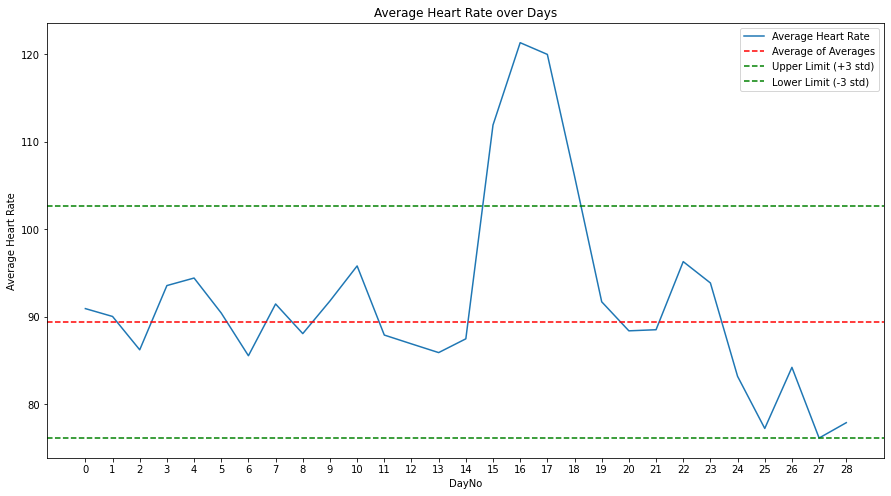

In [30]:
from scipy import stats # 3004792, 2102215, 1130656, 4213384

temp = df_selected[df_selected["SubjectNr"] == 2102215]

columns_to_average = ['HR{:02d}'.format(i) for i in range(24)]
columns_to_average = [col for col in columns_to_average if col in df_selected.columns]


hallo = temp[columns_to_average]
z_scores = np.abs(stats.zscore(hallo))
threshold = 2
outlier_mask = (z_scores > threshold).any(axis=1)
temp_without_outliers = hallo[~outlier_mask]

# Calculate the average for each row
averages = temp[columns_to_average].mean(axis=1).tolist() 
averages_24 = temp_without_outliers[columns_to_average].mean(axis=1).tolist()

std_of_averages = np.std(averages_24)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8)) 

average_of_averages = sum(averages_24) / len(averages_24)

# Calculate the upper and lower limits (+- 3 standard deviations)
upper_limit = average_of_averages + 3 * std_of_averages

lower_limit = average_of_averages - 3 * std_of_averages

# Plot the data
plt.plot(temp['DayNo'], averages, label='Average Heart Rate')
plt.xticks(temp['DayNo'])
plt.axhline(y=average_of_averages, color='r', linestyle='--', label='Average of Averages')
plt.axhline(y=upper_limit, color='g', linestyle='--', label='Upper Limit (+3 std)')
plt.axhline(y=lower_limit, color='g', linestyle='--', label='Lower Limit (-3 std)')


# Set labels and title
plt.xlabel('DayNo')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate over Days')

# Add a legend
plt.legend()

# Show the plot
plt.show()


###### Steps

In [31]:
# ## PLOT
# fig, ax = plt.subplots(figsize = (20, 12))

# col = "stepsTotalDaily"
# one_child = df[df["SubjectNr"] == 8380204] # weekday_Tue

# a = one_child.loc[one_child['anomaly2'] == -1, 
#            ['DayNo', col]]

# ax.plot(one_child['DayNo'], one_child[col], 
#         color = 'lightgreen', 
#         label = 'Normal')

# ax.scatter(a['DayNo'], a[col], 
#            color = 'red', 
#            label = 'Anomaly')

# plt.legend()
# plt.show();

###### Disease Type (asthma or CF)  
Which was detected more? Did some models prefer a disease type? 

###### Age (?)

###### Someone with out off average BMI (?)

###### Which Subject was picked the most for each model (SubjectNr, Disease Type, Age) and why (steps? heart rate? smth else?)

###### How is the distribution in non-null EventDay? Are more negative days (before asthma) predicted or more positive (after)?

###### More ideas?